# Import data

In [4]:
import pandas as pd
#reading the fake and true datasets

# Note: You must upload the two .csv files in the sidebar 
fake = pd.read_csv('../input/fake-and-real-news-dataset/Fake.csv')
fake['truth'] = 0
true = pd.read_csv('../input/fake-and-real-news-dataset/True.csv')
true['truth'] = 1

In [5]:
fake.head()

,title,text,subject,date,truth
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


In [6]:
true.head()

,title,text,subject,date,truth
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


Reuter's has a distinct format that we don't want the model to learn. Let's fix that:

In [7]:
true['text'][0]

'WASHINGTON (Reuters) - The head of a conservative Republican faction in the U.S. Congress, who voted this month for a huge expansion of the national debt to pay for tax cuts, called himself a “fiscal conservative” on Sunday and urged budget restraint in 2018. In keeping with a sharp pivot under way among Republicans, U.S. Representative Mark Meadows, speaking on CBS’ “Face the Nation,” drew a hard line on federal spending, which lawmakers are bracing to do battle over in January. When they return from the holidays on Wednesday, lawmakers will begin trying to pass a federal budget in a fight likely to be linked to other issues, such as immigration policy, even as the November congressional election campaigns approach in which Republicans will seek to keep control of Congress. President Donald Trump and his Republicans want a big budget increase in military spending, while Democrats also want proportional increases for non-defense “discretionary” spending on programs that support educat

In [8]:
def removeReutersFormat(x):
  x = x.split("-")[1:]
  return " ".join(x)

true['text'] = true[true['truth']==1]['text'].apply(removeReutersFormat)
true.head()

,title,text,subject,date,truth
0,"As U.S. budget fight looms, Republicans flip t...",The head of a conservative Republican faction...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,Transgender people will be allowed for the fi...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,The special counsel investigation of links be...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,Trump campaign adviser George Papadopoulos to...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,President Donald Trump called on the U.S. Pos...,politicsNews,"December 29, 2017",1


Now we can combine the dataframes.

In [9]:
combined = fake.append(true)
print(fake.shape, true.shape, combined.shape)
combined

(23481, 5) (21417, 5) (44898, 5)


,title,text,subject,date,truth
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0
...,...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,NATO allies on Tuesday welcomed President Don...,worldnews,"August 22, 2017",1
21413,LexisNexis withdrew two products from Chinese ...,"LexisNexis, a provider of legal, regulatory a...",worldnews,"August 22, 2017",1
21414,Minsk cultural hub becomes haven from authorities,In the shadow of disused Soviet era factories...,worldnews,"August 22, 2017",1
21415,Vatican upbeat on possibility of Pope Francis ...,Vatican Secretary of State Cardinal Pietro Pa...,worldnews,"August 22, 2017",1


Check for nulls

In [10]:
len(combined) - len(combined.dropna())

0

# Analysis

### N-grams
Some additional text preprocessing for ngram analysis

In [11]:
from sklearn.feature_extraction.text import CountVectorizer
from plotly.offline import iplot
%matplotlib inline
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)
from nltk.corpus import stopwords
import re
import string
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [12]:
def review_cleaning(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

In [13]:
combined['text']=combined['text'].apply(lambda x:review_cleaning(x))
combined.head()

,title,text,subject,date,truth
0,Donald Trump Sends Out Embarrassing New Year’...,donald trump just couldn t wish all americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,house intelligence committee chairman devin nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,on friday it was revealed that former milwauke...,News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,on christmas day donald trump announced that h...,News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,pope francis used his annual christmas day mes...,News,"December 25, 2017",0


In [14]:
stop = stopwords.words('english')
combined['text'] = combined['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
combined.head()

,title,text,subject,date,truth
0,Donald Trump Sends Out Embarrassing New Year’...,donald trump wish americans happy new year lea...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,house intelligence committee chairman devin nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,friday revealed former milwaukee sheriff david...,News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,christmas day donald trump announced would bac...,News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,pope francis used annual christmas day message...,News,"December 25, 2017",0


 Visualization with plotly
 

said 130037
trump 127770
us 65333
would 55006
president 53529
people 41183
one 36221
state 33477
also 31170
new 30007
donald 27431
clinton 27424
government 27390
house 27165
obama 27106
states 26101
republican 25206
could 23895
told 23345
united 23334


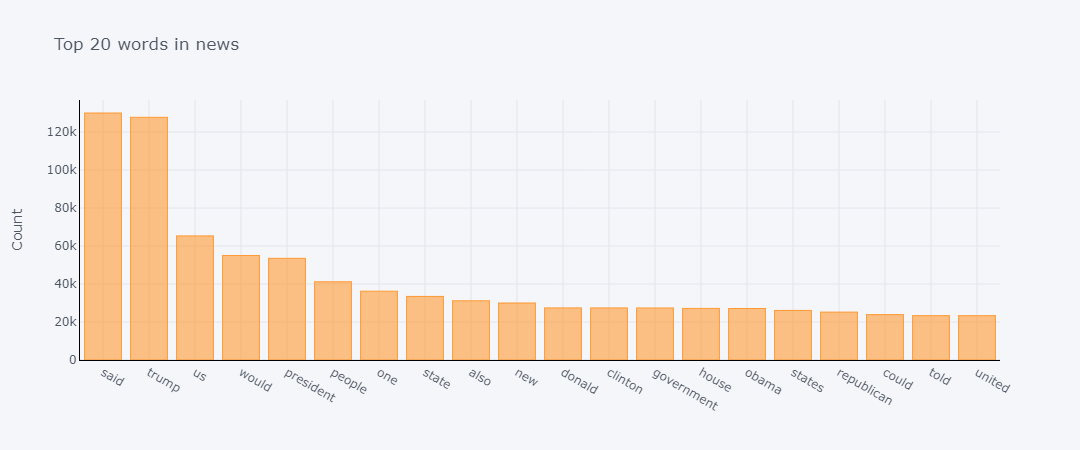

In [15]:
#Function to get top n words
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

#Calling function and return only top 20 words
common_words = get_top_n_words(combined['text'], 20)

#Printing the word and frequency
for word, freq in common_words:
    print(word, freq)

#Creating the dataframe of word and frequency
df1 = pd.DataFrame(common_words, columns = ['news' , 'count'])

#Group by words and plot the sum
fig = df1.groupby('news').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', yTitle='Count' ,linecolor='black', title='Top 20 words in news')



donald trump 25235
united states 18363
white house 14692
hillary clinton 9164
new york 7967
president donald 6832
north korea 6472
image via 6188
barack obama 5544
trump said 4783
prime minister 4723
last year 4549
last week 4532
said statement 4425
supreme court 4240
president trump 4220
us president 4073
president obama 3970
islamic state 3911
president barack 3860


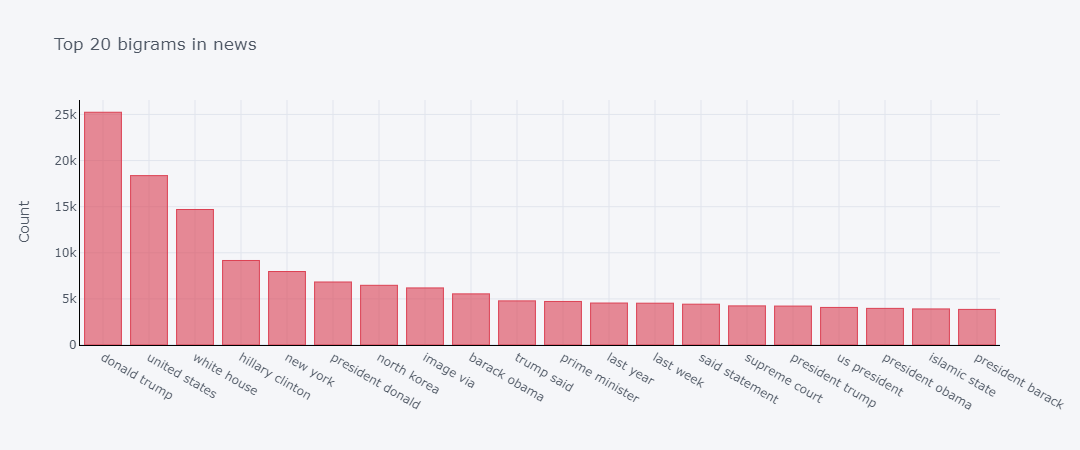

In [16]:
#Function to get top bigram words
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

#Calling function and return only top 20 words
common_words = get_top_n_bigram(combined['text'], 20)

#Printing the word and frequency
for word, freq in common_words:
    print(word, freq)
    
#Creating the dataframe of word and frequency
df3 = pd.DataFrame(common_words, columns = ['news' , 'count'])

#Group by words and plot the sum
df3.groupby('news').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', yTitle='Count', linecolor='black',color="red", title='Top 20 bigrams in news')

president donald trump 6717
president barack obama 3807
new york times 1981
donald trump realdonaldtrump 1695
black lives matter 1283
president united states 1093
white house said 1050
new york city 995
president vladimir putin 955
news century wire 939
national security adviser 882
elect donald trump 865
affordable care act 864
director james comey 845
speaker paul ryan 843
president elect donald 841
fbi director james 784
state rex tillerson 771
secretary state rex 765
russian president vladimir 746


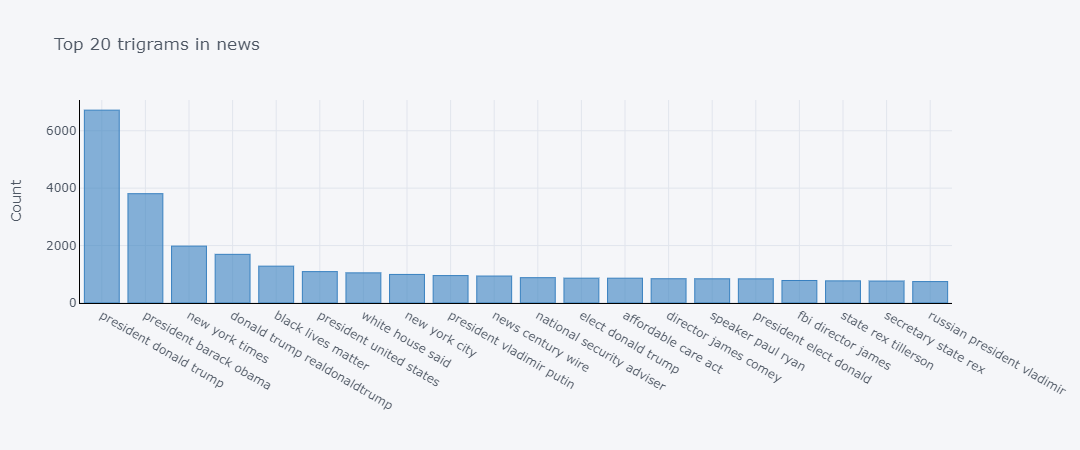

In [17]:
#Function to get top trigram words
def get_top_n_trigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3, 3), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

#Calling function and return only top 20 words
common_words = get_top_n_trigram(combined['text'], 20)

#Printing word and their respective frequencies
for word, freq in common_words:
    print(word, freq)

#Creating a dataframe with words and count
df6 = pd.DataFrame(common_words, columns = ['news' , 'count'])

#Grouping the words and plotting their frequencies
df6.groupby('news').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar',yTitle='Count', linecolor='black',color="blue", title='Top 20 trigrams in news')

### Subject Count Visualization
Visualize Count of News Articles by Subject interactively

In [18]:
import plotly.express as px

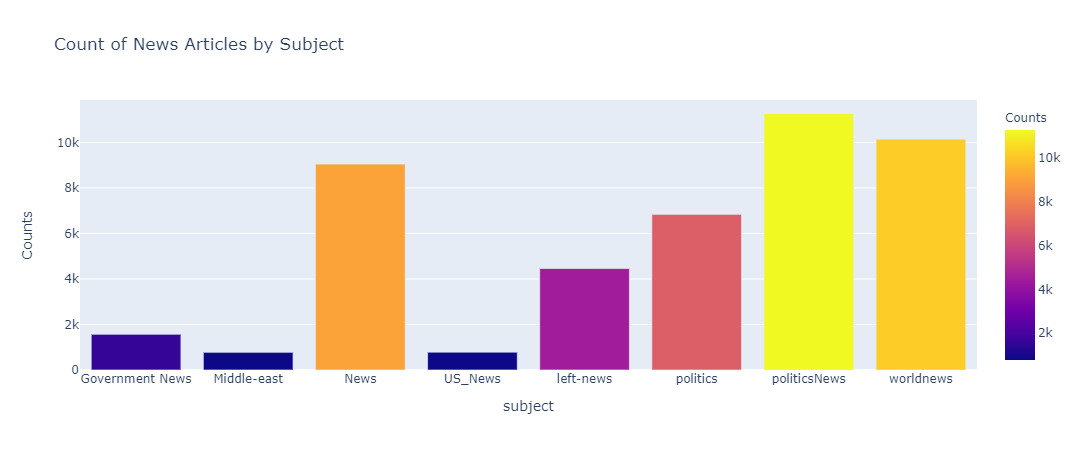

In [19]:

sub_check=combined.groupby('subject').apply(lambda x:x['title'].count()).reset_index(name='Counts')
fig=px.bar(sub_check,x='subject',y='Counts',color='Counts',title='Count of News Articles by Subject')
fig.show()

Before we run our data through the networks, we need to ensure the subjects between datasets are unified. Otherwise, it will simply learn the subjects and not properly classify the articles based on truth.

In [20]:
combined[combined['truth'] == 1]['subject'].value_counts()

politicsNews    11272
worldnews       10145
Name: subject, dtype: int64

In [21]:
combined[combined['truth'] == 0]['subject'].value_counts()

News               9050
politics           6841
left-news          4459
Government News    1570
US_News             783
Middle-east         778
Name: subject, dtype: int64

In [22]:
combined = combined.replace({'politicsNews': 'politics'}, regex=True)
combined = combined.replace({'left-news': 'politics'}, regex=True)
combined = combined.replace({'Government News': 'politics'}, regex=True)
combined = combined.replace({'US_News': 'worldnews'}, regex=True)
combined = combined.replace({'Middle-east': 'worldnews'}, regex=True)
combined = combined.replace({'News': 'worldnews'}, regex=True)

Visualize Count of News Articles with two category

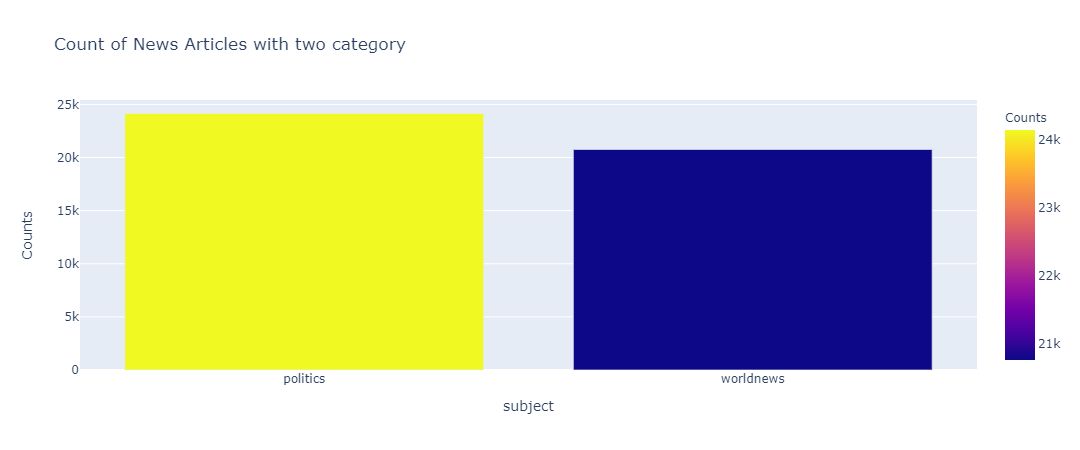

In [23]:
sub_check=combined.groupby( 'subject').apply(lambda x:x['title'].count()).reset_index(name='Counts')
fig=px.bar(sub_check,x='subject',y='Counts',color='Counts',title='Count of News Articles with two category',width=500)
fig.show()

### Topic Representation

<AxesSubplot:>

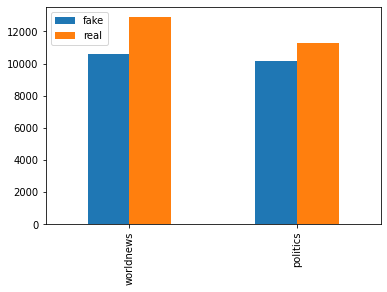

In [24]:
import matplotlib.pyplot as plt
import numpy as np

# Representation of each subject in each dataset 
_combined = combined['subject'].unique()
_X = np.arange(len(_combined))

x = combined[(combined['subject'] == 'worldnews')]['truth'].value_counts()
y = combined[(combined['subject'] == 'politics')]['truth'].value_counts()

df = pd.DataFrame(np.c_[x,y], index=_combined, columns=['fake', 'real'])
df.plot.bar()

### Topic Modeling

Source: https://towardsdatascience.com/end-to-end-topic-modeling-in-python-latent-dirichlet-allocation-lda-35ce4ed6b3e0

Drop non-text columns

In [25]:
topicModelFake = combined[combined['truth']==0].drop(columns=['date'])
topicModelReal = combined[combined['truth']==1].drop(columns=['date'])

Remove punctuation and lower

In [26]:
# Load the regular expression library
import re

# Remove symbols
topicModelFake['text_processed'] = topicModelFake['text'].map(lambda x: re.sub('[,\.!?]', '', x))
topicModelReal['text_processed'] = topicModelReal['text'].map(lambda x: re.sub('[,\.!?]', '', x))
# Convert the titles to lowercase 
topicModelFake['text_processed'] = topicModelFake['text_processed'].map(lambda x: x.lower())
topicModelReal['text_processed'] = topicModelReal['text_processed'].map(lambda x: x.lower())


In [27]:
import gensim
from gensim.utils import simple_preprocess
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
stop_words = stopwords.words('english')

def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
        
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts]
             
fake_data = topicModelFake.text_processed.values.tolist()
real_data = topicModelReal.text_processed.values.tolist()

fake_data_words = list(sent_to_words(fake_data))# remove stop words
fake_data_words = remove_stopwords(fake_data_words)
real_data_words = list(sent_to_words(real_data))# remove stop words
real_data_words = remove_stopwords(real_data_words)

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [28]:
import gensim.corpora as corpora
# Create Dictionary
fake_id2word = corpora.Dictionary(fake_data_words)
real_id2word = corpora.Dictionary(real_data_words)
# Create Corpus
fake_texts = fake_data_words
real_texts = real_data_words
# Term Document Frequency
fake_corpus = [fake_id2word.doc2bow(text) for text in fake_texts]
real_corpus = [real_id2word.doc2bow(text) for text in real_texts]

In [29]:
# number of topics
num_topics = 10
# Build LDA model
fake_lda_model = gensim.models.LdaMulticore(corpus=fake_corpus,
                                       id2word=fake_id2word,
                                       num_topics=num_topics)
real_lda_model = gensim.models.LdaMulticore(corpus=real_corpus,
                                       id2word=real_id2word,
                                       num_topics=num_topics)

fake_doc_lda = fake_lda_model[fake_corpus]
real_doc_lda = real_lda_model[real_corpus]

In [30]:
!pip install pyLDAvis

     |████████████████████████████████| 15.3 MB 8.8 MB/s eta 0:00:01     |████████████████████████▍       | 11.7 MB 8.8 MB/s eta 0:00:01
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully uninstalled numpy-1.19.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
yellowbrick 1.3.post1 requires numpy<1.20,>=1.16.0, but you have numpy 1.20.2 which is incompatible.
tensorflow 2.4.1 requires numpy~=1.19.2, but you have numpy 1.20.2 which is incompatible.
pdpbox 0.2.1 requires matplotlib==3.1.1, but you have matplotlib 3.4.0 which is incompatible.
optuna 2.6.0 requires numpy<1.20.0, but you have numpy 1.20.2 which is incompatible.
matrixprofile 1.1.10 requires protobuf==3.11.2, but you have protobuf 3.15.6 which is incompatible.
bokeh 2.3.0 requires tornado>=5.1, but you have tornado 5.0.2 which

In [31]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
pyLDAvis.enable_notebook()

# feed the LDA model into the pyLDAvis instance
lda_viz_fake = gensimvis.prepare(fake_lda_model, fake_corpus, fake_id2word)
lda_viz_real = gensimvis.prepare(real_lda_model, real_corpus, real_id2word)

In [32]:
# Topic model for real
pyLDAvis.display(lda_viz_real)

/opt/conda/lib/python3.7/site-packages/ipykernel/ipkernel.py:281: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [33]:
# Topic model for fake
pyLDAvis.display(lda_viz_fake)

/opt/conda/lib/python3.7/site-packages/ipykernel/ipkernel.py:281: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



### Sentiment Analysis

In [34]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /usr/share/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


/opt/conda/lib/python3.7/site-packages/ipykernel/ipkernel.py:281: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

/opt/conda/lib/python3.7/site-packages/nltk/twitter/__init__.py:20: UserWarning:

The twython library has not been installed. Some functionality from the twitter package will not be available.



In [35]:
sid.polarity_scores(combined['text'].head(1).iloc[0])

/opt/conda/lib/python3.7/site-packages/ipykernel/ipkernel.py:281: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



{'neg': 0.222, 'neu': 0.499, 'pos': 0.279, 'compound': 0.9584}

In [36]:
combined['text-score'] = combined['text'].apply(sid.polarity_scores)

/opt/conda/lib/python3.7/site-packages/ipykernel/ipkernel.py:281: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [37]:
combined['text-score'] = combined['text-score'].apply(lambda x :  x['compound'])

/opt/conda/lib/python3.7/site-packages/ipykernel/ipkernel.py:281: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



/opt/conda/lib/python3.7/site-packages/ipykernel/ipkernel.py:281: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



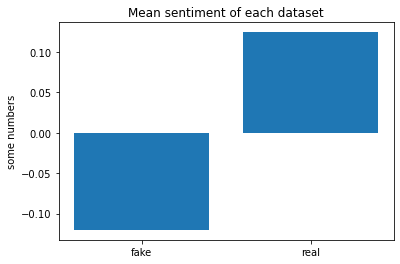

In [38]:
import matplotlib.pyplot as plt

meanWorld = combined[(combined['subject'] == 'worldnews')]['text-score'].mean()
meanPolitics = combined[(combined['subject'] == 'politics')]['text-score'].mean()
x = ['fake', 'real']
y = [meanWorld, meanPolitics]

plt.title("Mean sentiment of each dataset")
plt.bar(x, y)
plt.ylabel('some numbers')
plt.show()

# Classification


## Logistic Regression
[Source](https://towardsdatascience.com/a-complete-sentiment-analysis-algorithm-in-python-with-amazon-product-review-data-step-by-step-2680d2e2c23b)

### Text

In [39]:
X = combined['text']
y = combined['truth']

# Split data 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Use CountVectorizer to vectorize words in text
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
vecTrain = cv.fit_transform(X_train)
vecTest = cv.transform(X_test)

/opt/conda/lib/python3.7/site-packages/ipykernel/ipkernel.py:281: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



We can use Logistic Regression for our binary classification

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
model = LogisticRegression(max_iter=500)
model.fit(vecTrain, y_train)

/opt/conda/lib/python3.7/site-packages/ipykernel/ipkernel.py:281: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



LogisticRegression(max_iter=500)

In [41]:
y_pred_class = model.predict(vecTest)

/opt/conda/lib/python3.7/site-packages/ipykernel/ipkernel.py:281: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [42]:
accuracy_score(y_test, y_pred_class)

/opt/conda/lib/python3.7/site-packages/ipykernel/ipkernel.py:281: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



0.9893986636971047

## CNN model

In deep learning, we generally use Convolutional Neural Networks and their variants to classify image data. So most of the people thinks *we can use them only for image data*.

But a convolution operator **extracts** features from a data given. And if data has dimension more than one, we can use it with a convolution operator. And if we use **word embeddings** to convert words we can use a Convolutional Neural Network. 

In [43]:
import pandas as pd
import numpy as np
import re

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

import time
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix
import matplotlib.pyplot as plt


/opt/conda/lib/python3.7/site-packages/ipykernel/ipkernel.py:281: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [44]:
data = combined.loc[:,["text", "truth"]]
data.head()

/opt/conda/lib/python3.7/site-packages/ipykernel/ipkernel.py:281: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,text,truth
0,donald trump wish americans happy new year lea...,0
1,house intelligence committee chairman devin nu...,0
2,friday revealed former milwaukee sheriff david...,0
3,christmas day donald trump announced would bac...,0
4,pope francis used annual christmas day message...,0


In [45]:
x = data["text"]
y = data["truth"]


/opt/conda/lib/python3.7/site-packages/ipykernel/ipkernel.py:281: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [46]:
def cleanText(text):
    cleaned = re.sub("[^'a-zA-Z0-9]"," ",text)
    lowered = cleaned.lower().strip()
    return lowered

/opt/conda/lib/python3.7/site-packages/ipykernel/ipkernel.py:281: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [47]:
x_cleaned = [cleanText(t) for t in x]

/opt/conda/lib/python3.7/site-packages/ipykernel/ipkernel.py:281: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [48]:
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(x_cleaned)
x_tokenized = tokenizer.texts_to_sequences(x_cleaned)

/opt/conda/lib/python3.7/site-packages/ipykernel/ipkernel.py:281: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [49]:

length_array = [len(s) for s in x_tokenized]
SEQUENCE_LENGTH = int(np.quantile(length_array,0.75))

/opt/conda/lib/python3.7/site-packages/ipykernel/ipkernel.py:281: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [50]:
x_padded = pad_sequences(x_tokenized,maxlen=SEQUENCE_LENGTH)

/opt/conda/lib/python3.7/site-packages/ipykernel/ipkernel.py:281: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [51]:
x_train,x_test,y_train,y_test = train_test_split(x_padded,y,test_size=0.2,random_state=42)

/opt/conda/lib/python3.7/site-packages/ipykernel/ipkernel.py:281: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [52]:
# We've added 1 because or word index has numbers from 1 to end but we've added
# 0 tokens in padding so our vocab now has len(tokenizer.word_index) + 1
VOCAB_LENGTH = len(tokenizer.word_index) + 1
VECTOR_SIZE = 100

def getModel():
    """
    Returns a trainable Sigmoid Convolutional Neural Network
    """
    model = keras.Sequential()
    model.add(layers.Embedding(input_dim=VOCAB_LENGTH,
                               output_dim=VECTOR_SIZE,
                               input_length=SEQUENCE_LENGTH
                              ))
    
    model.add(layers.Conv1D(128,kernel_size=4))
    model.add(layers.BatchNormalization())
    model.add(layers.Activation("relu"))
    model.add(layers.MaxPooling1D(2))
    
    model.add(layers.Conv1D(256,kernel_size=4))
    model.add(layers.BatchNormalization())
    model.add(layers.Activation("relu"))
    model.add(layers.MaxPooling1D(2))
    
    model.add(layers.Conv1D(512,kernel_size=4))
    model.add(layers.BatchNormalization())
    model.add(layers.Activation("relu"))
    model.add(layers.MaxPooling1D(2))

    model.add(layers.Conv1D(1024,kernel_size=4))
    model.add(layers.BatchNormalization())
    model.add(layers.Activation("relu"))
    model.add(layers.MaxPooling1D(2))
    
    model.add(layers.Flatten())
    model.add(layers.Dense(1,activation="sigmoid"))
    
    model.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy"])
    
    return model


/opt/conda/lib/python3.7/site-packages/ipykernel/ipkernel.py:281: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [53]:
model = getModel()
model.summary()

/opt/conda/lib/python3.7/site-packages/ipykernel/ipkernel.py:281: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 236, 100)          19179800  
_________________________________________________________________
conv1d (Conv1D)              (None, 233, 128)          51328     
_________________________________________________________________
batch_normalization (BatchNo (None, 233, 128)          512       
_________________________________________________________________
activation (Activation)      (None, 233, 128)          0         
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 116, 128)          0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 113, 256)          131328    
_________________________________________________________________
batch_normalization_1 (Batch (None, 113, 256)          1

In [54]:
history = model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=1)

/opt/conda/lib/python3.7/site-packages/ipykernel/ipkernel.py:281: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



1123/1123 [==============================] - 723s 642ms/step - loss: 0.2226 - accuracy: 0.9224 - val_loss: 0.2700 - val_accuracy: 0.9354


## Title Classification
While the two models performed similarly, Logistic Regression performed slightly better. To make the most our data, we can also build a model to predict validity based on the title text. Below is an implemention and closer look at what passes and what does not:

### Title


In [55]:
X = combined['title']
y = combined['truth']

# Split data 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Use CountVectorizer to vectorize words in text
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
vecTrain = cv.fit_transform(X_train)
vecTest = cv.transform(X_test)

/opt/conda/lib/python3.7/site-packages/ipykernel/ipkernel.py:281: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Now we train a Logistic Regression model again for the titles

In [56]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
model = LogisticRegression(max_iter=500)
model.fit(vecTrain, y_train)

/opt/conda/lib/python3.7/site-packages/ipykernel/ipkernel.py:281: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



LogisticRegression(max_iter=500)

In [57]:
y_pred_class = model.predict(vecTest)

/opt/conda/lib/python3.7/site-packages/ipykernel/ipkernel.py:281: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [58]:
title_accuracy = accuracy_score(y_test, y_pred_class)

/opt/conda/lib/python3.7/site-packages/ipykernel/ipkernel.py:281: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



### Evaluation
Now let's take a closer look at how it classifies:

In [59]:
bogus = cv.transform(["This is not a real article title, let's see if it works!"])
model.predict(bogus)

/opt/conda/lib/python3.7/site-packages/ipykernel/ipkernel.py:281: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



array([0])

In [60]:
# Sample from internet
real = cv.transform(["President Biden announces steps to limit 'ghost' guns, plans to tackle assault weapons"])
model.predict(real)

/opt/conda/lib/python3.7/site-packages/ipykernel/ipkernel.py:281: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



array([1])

Amazing! Let's try something tricker.

In [61]:
fake = cv.transform(["President Romney announces steps to limit 'ghost' guns, plans to tackle assault weapons"])
model.predict(fake)

/opt/conda/lib/python3.7/site-packages/ipykernel/ipkernel.py:281: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



array([1])

In [62]:
fake = cv.transform(["United Nations formally legalizes public uriniation"])
model.predict(fake)

/opt/conda/lib/python3.7/site-packages/ipykernel/ipkernel.py:281: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



array([1])

Oof. It doesn't know who the president is and can be spoofed.